In [26]:
# General Utility
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
sns.set()
%matplotlib inline

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split 

In [40]:
nb_seed = 1234

In [28]:
from imblearn.datasets import make_imbalance

In [74]:
CSV_PATH = os.path.join('data', 'example', 'mammography.csv')
df = pd.read_csv(CSV_PATH, encoding='latin1')
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6,class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [94]:
df.shape

(11183, 7)

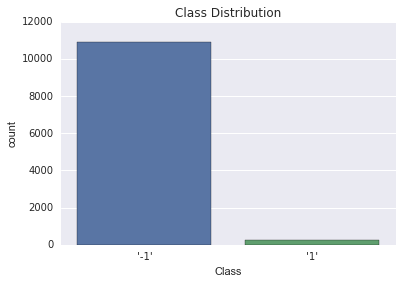

In [75]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(df['class'], ax=ax)
ax.set(xlabel='Class')
plt.title('Class Distribution')

In [76]:
target = df['class']
target.value_counts()

'-1'    10923
'1'       260
Name: class, dtype: int64

In [77]:
y = (target == "'-1'").astype(np.int)
X = df.iloc[:, :-1]
X.shape

(11183, 6)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y.values,
                                                    test_size=0.3,
                                                    random_state=nb_seed)

The testing data will be held out for validation at the end.

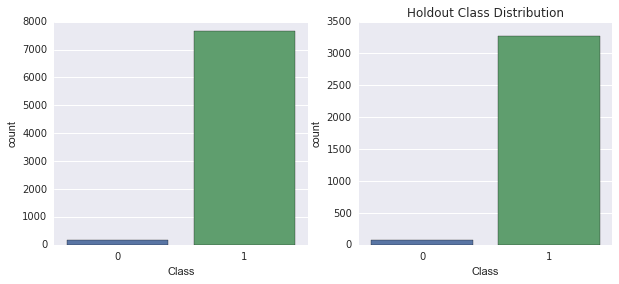

In [131]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(y_train, ax=ax0)
ax0.set(xlabel='Class')
plt.title('Training Class Distribution')
sns.countplot(y_test, ax=ax1)
ax1.set(xlabel='Class')
plt.title('Holdout Class Distribution')

In [132]:
print('Class 0 makes up {:2.3f}% of the {} data'
      .format(y_train[y_train == 0].shape[0] * 100 / y_train.shape[0], 'Model Building'))
print('Class 0 makes up {:2.3f}% of the {} data'
      .format(y_test[y_test == 0].shape[0] * 100 / y_test.shape[0], 'Holdout'))

Class 0 makes up 2.261% of the Model Building data
Class 0 makes up 2.474% of the Holdout data


From these printouts, we see that the model building and holdout data have slightly different distributions. Modeling is based on the assumption that the data is being produced by a fairly non-random, approximately consistent process. From this assumption, we treat the training data as a representative sample of data produced by this process. If we use a biased training set, then our model will probably be slightly biased.

## Using Stratification to produce comparable model-building and holdout data

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y.values, 
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=nb_seed)

The testing data will be held out for validation at the end.

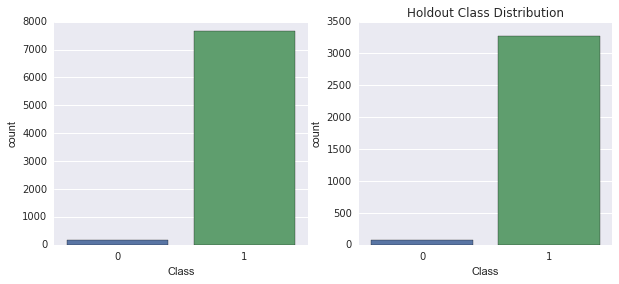

In [134]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(y_train, ax=ax0)
ax0.set(xlabel='Class')
plt.title('Training Class Distribution')
sns.countplot(y_test, ax=ax1)
ax1.set(xlabel='Class')
plt.title('Holdout Class Distribution')

In [135]:
print('Class 0 makes up {:2.3f}% of the {} data'
      .format(y_train[y_train == 0].shape[0] * 100 / y_train.shape[0], 'Model Building'))
print('Class 0 makes up {:2.3f}% of the {} data'
      .format(y_test[y_test == 0].shape[0] * 100 / y_test.shape[0], 'Holdout'))

Class 0 makes up 2.325% of the Model Building data
Class 0 makes up 2.325% of the Holdout data


From these distribution plots, we see that train_test_split with stratify enabled produced comparably imbalanced datasets, and from the printout, we see that the minority class makes up 2.325% of the data in both the model building and holdout data. That is as we expect.

### Stratified

In [90]:
def stratified_kfold_check(n, X_train_, y_train_, nb_seed=nb_seed):
    skfolds = StratifiedKFold(n_splits=n, random_state=nb_seed)
    for train_index, test_index in skfolds.split(X_train_, y_train_):
        X_train_folds = X_train_[train_index]
        y_train_folds = (y_train_[train_index])
        X_test_folds = X_train_[test_index]
        y_test_folds = (y_train_[test_index])
        print('Total class observations:       {:4d}'
              .format(len(y_train_folds)))
        print('Number of class {} observations: {:4d}'
              .format(1,len(y_train_folds[y_train_folds == 1])))
        print('Number of class {} observations: {:4d}\n'
              .format(0,len(y_train_folds[y_train_folds == 0])))

In [91]:
stratified_kfold_check(5, X_train, y_train)

Total class observations:       6709
Number of class 1 observations: 6553
Number of class 0 observations:  156

Total class observations:       6709
Number of class 1 observations: 6553
Number of class 0 observations:  156

Total class observations:       6710
Number of class 1 observations: 6554
Number of class 0 observations:  156

Total class observations:       6710
Number of class 1 observations: 6554
Number of class 0 observations:  156

Total class observations:       6710
Number of class 1 observations: 6554
Number of class 0 observations:  156



In [92]:
stratified_kfold_check(7, X_train, y_train)

Total class observations:       7188
Number of class 1 observations: 7021
Number of class 0 observations:  167

Total class observations:       7188
Number of class 1 observations: 7021
Number of class 0 observations:  167

Total class observations:       7189
Number of class 1 observations: 7022
Number of class 0 observations:  167

Total class observations:       7189
Number of class 1 observations: 7022
Number of class 0 observations:  167

Total class observations:       7189
Number of class 1 observations: 7022
Number of class 0 observations:  167

Total class observations:       7189
Number of class 1 observations: 7022
Number of class 0 observations:  167

Total class observations:       7190
Number of class 1 observations: 7022
Number of class 0 observations:  168



In [95]:
stratified_kfold_check(2, X_train, y_train)

Total class observations:       4193
Number of class 1 observations: 4096
Number of class 0 observations:   97

Total class observations:       4194
Number of class 1 observations: 4096
Number of class 0 observations:   98



In [97]:
def rep_stratified_kfold_check(n, reps, X_train_, y_train_, nb_seed=nb_seed):
    skfolds = RepeatedStratifiedKFold(n_splits=n, n_repeats=reps, random_state=nb_seed)
    for train_index, test_index in skfolds.split(X_train_, y_train_):
        X_train_folds = X_train_[train_index]
        y_train_folds = (y_train_[train_index])
        X_test_folds = X_train_[test_index]
        y_test_folds = (y_train_[test_index])
        print('Total class observations:       {:4d}'
              .format(len(y_train_folds)))
        print('Number of class {} observations: {:4d}'
              .format(1,len(y_train_folds[y_train_folds == 1])))
        print('Number of class {} observations: {:4d}\n'
              .format(0,len(y_train_folds[y_train_folds == 0])))

In [99]:
rep_stratified_kfold_check(3, 4, X_train, y_train)

Total class observations:       5591
Number of class 1 observations: 5461
Number of class 0 observations:  130

Total class observations:       5591
Number of class 1 observations: 5461
Number of class 0 observations:  130

Total class observations:       5592
Number of class 1 observations: 5462
Number of class 0 observations:  130

Total class observations:       5591
Number of class 1 observations: 5461
Number of class 0 observations:  130

Total class observations:       5591
Number of class 1 observations: 5461
Number of class 0 observations:  130

Total class observations:       5592
Number of class 1 observations: 5462
Number of class 0 observations:  130

Total class observations:       5591
Number of class 1 observations: 5461
Number of class 0 observations:  130

Total class observations:       5591
Number of class 1 observations: 5461
Number of class 0 observations:  130

Total class observations:       5592
Number of class 1 observations: 5462
Number of class 0 observations

Total class observations:       6710
Number of class 1 observations: 6574
Number of class 0 observations:  136
